In [8]:
import pandas as pd
import numpy as np
import datetime
from scorepi import *
from epiweeks import Week
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pickle
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def prob_avg_ensemble(predictions_list):

    target_list = list(predictions_list[0].target.unique())

    interpvalsdf = pd.DataFrame(columns=['target', 'interpvals'])
    for wk in target_list:

        interpvals = []
        for i in range(len(predictions_list)):
            s = predictions_list[i][predictions_list[i]['target'] ==wk ]
            vals = list(s['value'])
            for j in range(len(vals)):
                interpvals.append(vals[j])
            
        new_row = {'target':wk, 'interpvals':interpvals}
 
        interpvalsdf = interpvalsdf.append(new_row, ignore_index=True)
    
    interpresults = pd.DataFrame(columns=['scenario_letter', 'quantile_val','xvalue', 'target'])

    for wk in target_list:

        for i in range(len(predictions_list)):
            interpvals = list(interpvalsdf[interpvalsdf['target']==wk].interpvals)[0]
    
            sample = predictions_list[i][predictions_list[i].target == wk ]
    
            sample = sample[sample['type']=='quantile']
    
            quantiles = list(sample['quantile'])
            vals = list(sample['value'])

            a = zip(vals, quantiles)
            a=list(a)
            res = sorted(a, key = lambda x: x[1])
            vals, quants = list(zip(*res))

            vals = list(vals)
            quants = list(quants)
    
            y = np.interp(interpvals, vals, quants)
    
    
            a = zip(interpvals, y)
            a=list(a)
            res = sorted(a, key = lambda x: x[1])
            interpvals, y = list(zip(*res))
    
    
            letter = list(sample.scenario_letter.unique())[0]
            y = list(y)
            interpvals = list(interpvals)
            for i in range(len(y)):
                qval = y[i]
                xval = interpvals[i]
                new_row = {'scenario_letter':letter, 'quantile_val':qval,'xvalue':xval, 'target':wk}
 
                interpresults = interpresults.append(new_row, ignore_index=True)

    df2 = interpresults.groupby(['target', 'xvalue'])['quantile_val'].mean()
    allxvals = list(df2.index)

    probavg = pd.DataFrame(columns=['xval', 'avg_quant', 'target'])

    for i in allxvals:
        avgquant = df2[i]
        targ = i[0]
        val = i[1]
        new_row = {'xval':val, 'avg_quant':avgquant, 'target':targ}
 
        probavg = probavg.append(new_row, ignore_index=True)
    
    
    
    probavg_ret = pd.DataFrame(columns=['quantile','value', 'target', 'target_end_date'])
    ind = 0

    enddates = predictions_list[0].target_end_date.unique()
    for wk in target_list:
        enddate = enddates[ind]
        ind+=1
        ret_quants = list(predictions_list[0][predictions_list[0].target =='1 wk ahead inc ' + str(target)]['quantile'].unique())
        curquants = list(probavg[probavg['target']==wk]['avg_quant'])
        curxs = list(probavg[probavg['target']==wk]['xval'])
        yret = np.interp(ret_quants, curquants, curxs)
    
        yret = list(yret)
    
        for i in range(len(yret)):
            new_row = {'quantile':ret_quants[i],'value':yret[i], 'target':wk, 'target_end_date':enddate}
 
            probavg_ret = probavg_ret.append(new_row, ignore_index=True)
    
   # probavg_ret = Predictions(probavg_ret, t_col='target_end_date')
    
    return probavg_ret


In [4]:
# all models
allmodels = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

allrds = [ 5, 6, 7, 9, 11, 12, 13, 14, 15, 16]



In [5]:
locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})

In [6]:
modelsall = ['CU-AGE-ST', 'Ensemble_LOP', 'Ensemble_LOP_untrimmed', 'Ensemble', 'JHU_IDD-CovidSP', 'Karlen-pypm',
             'MOBS_NEU-GLEAM_COVID', 'USC-SIkJalpha', 'UVA-adaptive', 'JHUAPL-Bucky', 'UNCC-hierbin', 'UVA-EpiHiper',
            'COVIDhub-baseline_4wks', 'COVIDhub-ensemble_4wks']

In [20]:
rd = 5
start_week = Week(2021,17)
end_week = Week(2021,43)
max_date = datetime.datetime(2021, 6, 19)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd5 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd5 = pd.concat([predictions_rd5, predictions])

In [21]:
rd = 6
start_week = Week(2021,22)
end_week = Week(2021,47)
max_date = datetime.datetime(2021, 12, 18)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd6 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd6 = pd.concat([predictions_rd6, predictions])

In [22]:
rd = 7
start_week = Week(2021,27)
end_week = Week(2021,52)
max_date = datetime.datetime(2021, 12, 18)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd7 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd7 = pd.concat([predictions_rd7, predictions])

In [23]:
rd = 9
start_week = Week(2021,37)
end_week = Week(2022,9)
max_date = datetime.datetime(2021, 12, 18)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd9 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd9 = pd.concat([predictions_rd9, predictions])

In [24]:
rd = 11
start_week = Week(2021,51)
end_week = Week(2022, 10)
#max_date = datetime.datetime(2021, 12, 21)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd11 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd11 = pd.concat([predictions_rd11, predictions])

In [25]:
rd = 12
start_week = Week(2022,2)
end_week = Week(2022, 13)
#max_date = datetime.datetime(2021, 12, 21)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd12 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd12 = pd.concat([predictions_rd12, predictions])

In [26]:
rd = 13
start_week = Week(2022,11)
end_week = Week(2023, 11)
#max_date = datetime.datetime(2021, 12, 21)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd13 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd13 = pd.concat([predictions_rd13, predictions])

In [27]:
rd = 14
start_week = Week(2022,23)
end_week = Week(2023, 23)
#max_date = datetime.datetime(2021, 12, 21)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd14 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd14 = pd.concat([predictions_rd14, predictions])

In [28]:
rd = 15
start_week = Week(2022,31)
end_week = Week(2023, 18)
#max_date = datetime.datetime(2021, 12, 21)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd15 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd15 = pd.concat([predictions_rd15, predictions])

In [29]:
rd = 16
start_week = Week(2022,44)
end_week = Week(2023, 17)
#max_date = datetime.datetime(2021, 12, 21)
models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed"]

#models = modelsall

predictions_rd16 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
    
        predictions_rd16 = pd.concat([predictions_rd16, predictions])

In [42]:
predictions_rd6

,scenario_id,scenario_name,target,target_end_date,location,value,type,quantile,model_projection_date,Model
0,A-2021-06-08,highVac_lowVar,1 wk ahead cum case,2021-06-05,01,5.441363e+05,quantile,0.010,2021-05-29,Ensemble
1,A-2021-06-08,highVac_lowVar,1 wk ahead cum case,2021-06-05,02,6.988600e+04,quantile,0.010,2021-05-29,Ensemble
2,A-2021-06-08,highVac_lowVar,1 wk ahead cum case,2021-06-05,04,8.815535e+05,quantile,0.010,2021-05-29,Ensemble
3,A-2021-06-08,highVac_lowVar,1 wk ahead cum case,2021-06-05,05,3.419877e+05,quantile,0.010,2021-05-29,Ensemble
4,A-2021-06-08,highVac_lowVar,1 wk ahead cum case,2021-06-05,06,3.791808e+06,quantile,0.010,2021-05-29,Ensemble
...,...,...,...,...,...,...,...,...,...,...
818059,D-2021-06-08,lowVac_highVar,26 wk ahead cum hosp,2021-11-27,60,8.274691e-06,quantile,0.850,2021-05-29,Ensemble_LOP
818060,D-2021-06-08,lowVac_highVar,26 wk ahead cum hosp,2021-11-27,60,1.511759e-05,quantile,0.900,2021-05-29,Ensemble_LOP
818061,D-2021-06-08,lowVac_highVar,26 wk ahead cum hosp,2021-11-27,60,3.494351e-05,quantile,0.950,2021-05-29,Ensemble_LOP
818062,D-2021-06-08,lowVac_highVar,26 wk ahead cum hosp,2021-11-27,60,6.037216e-05,quantile,0.975,2021-05-29,Ensemble_LOP


In [43]:
model = "MOBS_NEU-GLEAM_COVID"
rd=12
predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

loclist = list(predictions.location.unique())
loclist.remove('US')

In [52]:
# calculate all coverages

#plt.subplots(3,4, figsize=(15, 12))

covers = [10,20,30,40,50,60,70,80,90,95,98]
covsy = [cv/100 for cv in covers]


#startdates = [Week(2021,13), Week(2021,18), Week(2021,22), Week(2021,27), Week(2021,37), Week(2021,46), Week(2021,51),
#             Week(2022,2), Week(2022,11), Week(2022,23), Week(2022,31), Week(2022,44)]


#enddates = [Week(2021,38), Week(2021,43), Week(2021,47), Week(2021,52), Week(2022,9), Week(2022, 19), Week(2022, 10),
    #       Week(2022, 13), Week(2023, 11), Week(2023, 23), Week(2023, 18), Week(2023, 17)]

#predsall = [predictions_rd4, predictions_rd5, predictions_rd6, predictions_rd7, predictions_rd9, predictions_rd10,
#            predictions_rd11, predictions_rd12, predictions_rd13, predictions_rd14, predictions_rd15, predictions_rd16]


startdates = [ Week(2021,18), Week(2021,22), Week(2021,27), Week(2021,37), Week(2021,51),
             Week(2022,2), Week(2022,11), Week(2022,23), Week(2022,31), Week(2022,44)]


enddates = [ Week(2021,43), Week(2021,47), Week(2021,52), Week(2022,9),  Week(2022, 10),
           Week(2022, 13), Week(2023, 11), Week(2023, 23), Week(2023, 18), Week(2023, 17)]

predsall = [ predictions_rd5, predictions_rd6, predictions_rd7, predictions_rd9, 
            predictions_rd11, predictions_rd12, predictions_rd13, predictions_rd14, predictions_rd15, predictions_rd16]




#predsall = [predictions_rd5]

rds = [ 5, 6, 7, 9, 11, 12, 13, 14 ,15, 16]

#rds = [14]

ind = 0

target = 'case'

avgcov_all = {}
numobs_rds = []
numpred_rds = []

for predrd in predsall:
    
    rd = rds[ind]
    
    start_week = startdates[ind]
    end_week = enddates[ind]
    
    ind += 1
    
    if rd in [4, 5]:
        max_date = datetime.datetime(2021, 6, 19)
    elif rd in [6,7,8,9]:
        max_date = datetime.datetime(2021, 12, 18)
    else:
        max_date = None


       
    
    lop_ensembles = dict()

    coveragedf = pd.DataFrame(columns=['Model', '10_cov', '20_cov', '30_cov', '40_cov', '50_cov', '60_cov', '70_cov',
                                       '80_cov', '90_cov', '95_cov', '98_cov', 'Location', 'Case'])



    for l in loclist:
        lop_ensembles[l] = {}

        #target = 'death'
        #target = 'hosp'
        #target = 'case'
        incidence = True
        target_location = l


        if target == 'hosp':
            target_obs = 'hospitalization'
        else:
            target_obs = target
        observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
        observations['date'] = pd.to_datetime(observations['date'])

        #filter start - end week
        observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                                (observations['date'] <= pd.to_datetime(end_week.enddate()))]



        #filter location
        observations = observations[observations['location'] == target_location]

        #aggregate to weekly
        observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

        if max_date:
            observations = observations[observations['date'] <= max_date].copy()

        #transform to Observation object
        observations = Observations(observations)



        locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
        location_mapping = dict()
        for loc in locations['location']:
            location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]


        target_prediction_list = [f"{i} wk ahead {'inc' if incidence else 'cum'} {target}" for i in range(1,len(observations)+1)]

        #models = predrd.Model.unique()
        models = ['Ensemble', 'Ensemble_LOP', 'Ensemble_LOP_untrimmed']
        
        for model in models:    
            try:
                predictions = predrd[predrd.Model == model]
                predictions['target_end_date'] = pd.to_datetime(predictions['target_end_date'])
                predictions = predictions[predictions.location != 'US']
                predictions = predictions.astype({'location':'int'})
                predictions["scenario_letter"] = predictions.scenario_id.str[0]

                locations = locations[locations.location != 'US']
                locations = locations.astype({'location':'int'})

                predictions = predictions.merge(locations, how='inner', on='location')

                target_locations = int(target_location)

                pred = predictions[predictions['location'] == int(target_location)].copy()

                #filter target
                pred = pred[(pred['target'].isin(target_prediction_list))]

                #filter max date
                if max_date:
                    pred = pred[pred['target_end_date'] <= max_date]

                if len(pred) == 0:
                    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

                scenarios = list(pred['scenario_id'].drop_duplicates())
                predictions_list = [Predictions(pred[pred['scenario_id'] == scenario], t_col='target_end_date') for scenario in scenarios]
                lop_ensemble_predictions = Predictions(prob_avg_ensemble(predictions_list), t_col='target_end_date')
                lop_ensembles[l][model] = lop_ensemble_predictions
                
                predictions_list += [lop_ensemble_predictions]

                #labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Median aggregate"]

                labels2 = ["LOP aggregate"]
                predictions_list2 = [lop_ensemble_predictions]

                aggregated_scores = dict()
                
                
                for label,predicts in zip(labels2,predictions_list2):
                    
                    d,_ = score_utils.all_scores_from_df(observations, predicts, mismatched_allowed=False)
                    
                    
                    aggregated_scores[label] = d

                aggregated_data = defaultdict(list)

                coverages = ['10_cov', '20_cov', '30_cov', '40_cov', '50_cov', '60_cov', '70_cov','80_cov', '90_cov', '95_cov', '98_cov']
                
                
                for label in ["LOP aggregate"]:
                    aggregated_data['Case'] += [label]

                    for cv in coverages:

                        aggregated_data[cv] += [aggregated_scores[label][cv]]

                    agg_data_df = pd.DataFrame(aggregated_data)
                    agg_data_df['Model'] = model
                    agg_data_df['Location'] = l


                coveragedf = pd.concat([coveragedf, agg_data_df])


            except Exception as e:
                print(e)    

    df = coveragedf.copy()
    models = list(df.Model.unique())
    #models = models[0:-2]

    avgcov = {}
    
    numobs = observations.shape[0]
    numobs_rds.append(numobs)
    numpred_rds.append(len(list(lop_ensemble_predictions.target_end_date.unique())))
    
    for cv in coverages:
        df[cv] = df[cv]*numobs
    

    for model in models:
        testdf = df[df.Model == model]
        avgcov[model] = []

        for cv in coverages:
            cov = testdf[cv].mean()
            avgcov[model].append(cov)
            
    avgcov_all[rd] = avgcov
    



There are no predictions for model Ensemble_LOP_untrimmed at location 01
There are no predictions for model Ensemble_LOP_untrimmed at location 02
There are no predictions for model Ensemble_LOP_untrimmed at location 04
There are no predictions for model Ensemble_LOP_untrimmed at location 05
There are no predictions for model Ensemble_LOP_untrimmed at location 06
There are no predictions for model Ensemble_LOP_untrimmed at location 08
There are no predictions for model Ensemble_LOP_untrimmed at location 09
There are no predictions for model Ensemble_LOP_untrimmed at location 10
There are no predictions for model Ensemble_LOP_untrimmed at location 11
There are no predictions for model Ensemble_LOP_untrimmed at location 12
There are no predictions for model Ensemble_LOP_untrimmed at location 13
There are no predictions for model Ensemble_LOP_untrimmed at location 15
There are no predictions for model Ensemble_LOP_untrimmed at location 16
There are no predictions for model Ensemble_LOP_unt

There are no predictions for model Ensemble_LOP_untrimmed at location 15
There are no predictions for model Ensemble_LOP_untrimmed at location 16
There are no predictions for model Ensemble_LOP_untrimmed at location 17
There are no predictions for model Ensemble_LOP_untrimmed at location 18
There are no predictions for model Ensemble_LOP_untrimmed at location 19
There are no predictions for model Ensemble_LOP_untrimmed at location 20
There are no predictions for model Ensemble_LOP_untrimmed at location 21
There are no predictions for model Ensemble_LOP_untrimmed at location 22
There are no predictions for model Ensemble_LOP_untrimmed at location 23
There are no predictions for model Ensemble_LOP_untrimmed at location 24
There are no predictions for model Ensemble_LOP_untrimmed at location 25
There are no predictions for model Ensemble_LOP_untrimmed at location 26
There are no predictions for model Ensemble_LOP_untrimmed at location 27
There are no predictions for model Ensemble_LOP_unt

In [53]:
avgcov_all_case = avgcov_all

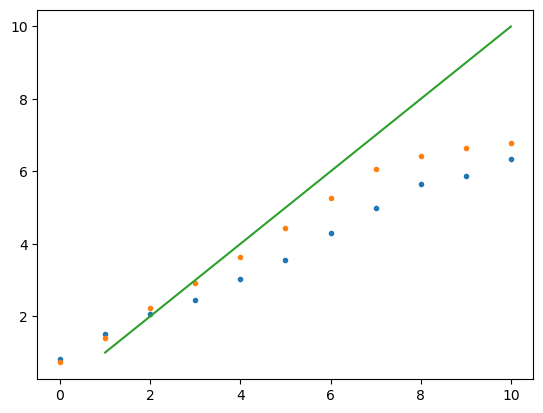

In [49]:
plt.plot(avgcov_all[5]['Ensemble'],'.')
plt.plot(avgcov_all[5]['Ensemble_LOP'],'.')
plt.plot(np.linspace(1,10,10), np.linspace(1,10,10))

In [ ]:
rds = [ 5, 6, 7, 9, 11, 12, 13, 14 ,15, 16]

#d = avgcov_all_hosp

#numobs = numobs_rds_case[1:]
numobs = numobs_rds_hosp

ensem = np.zeros(11)
ensemlop = np.zeros(11)
ensemlop_untrim = np.zeros(11)

nensem = 0
nlop = 0
nlopuntrim = 0


for d in [avgcov_all_hosp, avgcov_all_death, avgcov_all_case]:
    i=0
    for rd in rds:
        dic = d[rd]

        models = list(dic.keys())

        for model in models:
            if model == 'Ensemble':
                ensem = ensem + dic[model]
                nensem += numobs[i]
            elif model == 'Ensemble_LOP':
                ensemlop = ensemlop + dic[model]
                nlop += numobs[i]
            elif model == 'Ensemble_LOP_untrimmed':
                ensemlop_untrim = ensemlop_untrim + dic[model]
                nlopuntrim += numobs[i]
                
        i +=1

ensemavg = [i/nensem for i in ensem]
lopavg = [i/nlop for i in ensemlop]
untrimavg = [i/nlopuntrim for i in ensemlop_untrim]

In [ ]:
plt.subplots(2,5,figsize=(15,7), sharey=True, sharex=True)
rds = [ 5, 6, 7, 9, 11, 12, 13, 14 ,15, 16]

covers = [10,20,30,40,50,60,70,80,90,95,98]
covsy = [cv/100 for cv in covers]

i=1
for rd in rds:
    ensem = np.zeros(11)
    ensemlop = np.zeros(11)
    ensemlop_untrim = np.zeros(11)

    nensem = 0
    nlop = 0
    nlopuntrim = 0
    
    for d in [avgcov_all_hosp, avgcov_all_death, avgcov_all_case]:
        dic = d[rd]

        models = list(dic.keys())

        for model in models:
            if model == 'Ensemble':
                ensem = ensem + dic[model]
                nensem += numobs[i-1]
            elif model == 'Ensemble_LOP':
                ensemlop = ensemlop + dic[model]
                nlop += numobs[i-1]
            elif model == 'Ensemble_LOP_untrimmed':
                ensemlop_untrim = ensemlop_untrim + dic[model]
                nlopuntrim += numobs[i-1]
    ensemavg = [i/nensem for i in ensem]
    lopavg = [i/nlop for i in ensemlop]
    untrimavg = [i/nlopuntrim for i in ensemlop_untrim]    
        
    plt.subplot(2,5,i)
    plt.plot(covers, ensemavg, '-o', color = '#17B1BF',label = r'Ensemble_vincent$^2$')
    plt.plot(covers, lopavg, '-o', color = 'darkolivegreen', label = 'Ensemble_LOP$^2$')
    plt.plot(covers, untrimavg, '-o', color = 'gold', label = 'Ensemble_LOP_untrimmed$^2$')
    plt.plot(covers, covsy, 'k--',label = 'y = x',linewidth=2)  

    plt.title('Round '+ str(rd), fontsize=16)
    if i in [6, 7,8,9, 10]:
        plt.xlabel('Prediction interval', fontsize=16)
        plt.xticks(fontsize=12)
    
    if i in [1,6]:
        plt.ylabel('Coverage', fontsize=16)
        plt.yticks(fontsize=12)
    
   
    #if i ==1:
     #   plt.legend(loc='lower right', fontsize=12)
   # plt.xlabel('Prediction Interval', fontsize=14)
   # plt.ylabel('Coverage', fontsize=14)
    if i == 3:
        plt.legend(bbox_to_anchor=(.5, 1.35), loc='upper center', fontsize=14, ncol=4)

    i +=1    
#plt.legend(bbox_to_anchor=(.5, -.85), loc='lower center', fontsize=14, ncol=4)
#plt.suptitle(r'Coverage for All Targets for Ensemble$^2$ Models', fontsize=20)
plt.tight_layout()

#plt.savefig('coverage_allrds_518_fig6.pdf')
plt.show()